Name - Renuka Sutone
Topic -From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

Prediction using Unsupervised ML
(Level - Beginner)


In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Load IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
for i in range(2,11):
  # Instantiate the KMeans models
  km = KMeans(n_clusters=i, random_state=42)
  # Fit the KMeans model
  km.fit_predict(X)
  # Calculate Silhoutte Score
  score = silhouette_score(X, km.labels_, metric='euclidean')
  # Print the score
  print('Silhouetter Score for {} clusters: {} ' .format(i,score))

Silhouetter Score for 2 clusters: 0.681046169211746 
Silhouetter Score for 3 clusters: 0.5528190123564091 
Silhouetter Score for 4 clusters: 0.4980505049972867 
Silhouetter Score for 5 clusters: 0.4887488870931048 
Silhouetter Score for 6 clusters: 0.3648340039670018 
Silhouetter Score for 7 clusters: 0.34750423280461507 
Silhouetter Score for 8 clusters: 0.36179003359737993 
Silhouetter Score for 9 clusters: 0.34022340175905613 
Silhouetter Score for 10 clusters: 0.3074982370231849 


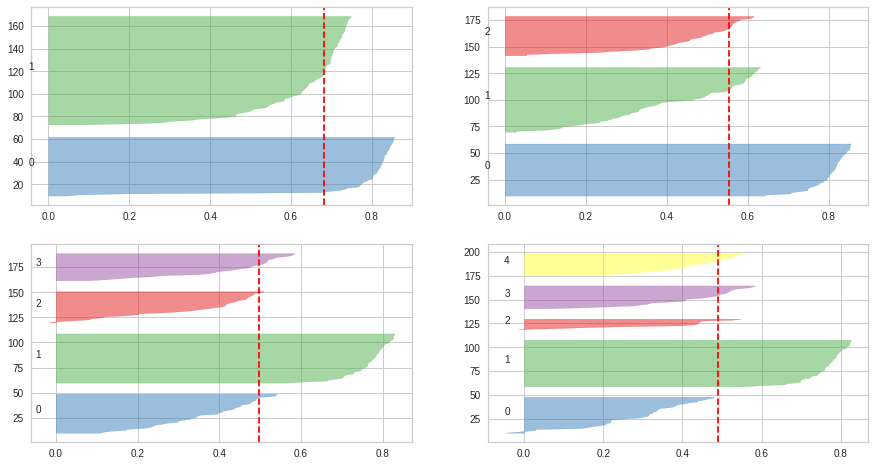

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=30)
    q, mod = divmod(i, 2)
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.

The value of n_clusters as 4 and 5 looks to be suboptimal for the given data due to the following reasons:
Presence of clusters with below-average silhouette scores 
Wide fluctuations in the size of the silhouette plots.


The value of 2 and 3 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores. Also, the fluctuation in size is similar. The thickness of the silhouette plot representing each cluster also is a deciding point. For the plot with n_cluster 3 (top right), the thickness is more uniform than the plot with n_cluster as 2 (top left) with one cluster thickness much more than the other. Thus, one can select the optimal number of clusters as 3.

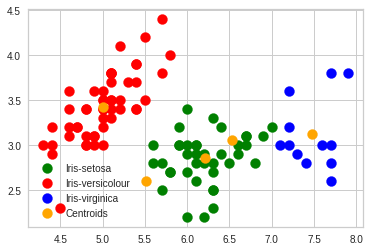

In [13]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
x = iris_df.iloc[:, [0, 1, 2, 3]].values
y_kmeans = km.fit_predict(x)
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'orange', label = 'Centroids')

plt.legend()